<a href="https://colab.research.google.com/github/Lfahima/sqlite_database_operations/blob/main/HHA_504_Assignment3_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

In [144]:
SB_df = pd.read_csv('stonybrook.csv')
SB_df.head(10)

,Code,Description,Type,Package/Line_Level,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
5,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Package,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
6,10010,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,588.00,588.00,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10021,"FINE NEEDLE ASPIRATION BIOPSY, FIRST GROWTH",Outpatient,Line,1566.78,1566.78,275.46,2265.50,1270.48,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10021,"FINE NEEDLE ASPIRATION BIOPSY, FIRST GROWTH",Outpatient,Package,1566.78,1566.78,275.46,2265.50,1270.48,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10030,DRAINAGE OF FLUID COLLECTION IN SOFT TISSUE US...,Outpatient,Line,2082.05,2082.05,152.66,4101.00,1663.85,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Identifying missing values in the dataset



In [145]:
SB_df.isnull().values.sum()

336423

## Replacing all missing values with 0

In [146]:
SB_df = SB_df.fillna(0)

## Confirming there are no missing values

In [147]:
SB_df.isnull().values.sum()

0

## Data distribution using histograms for few columns

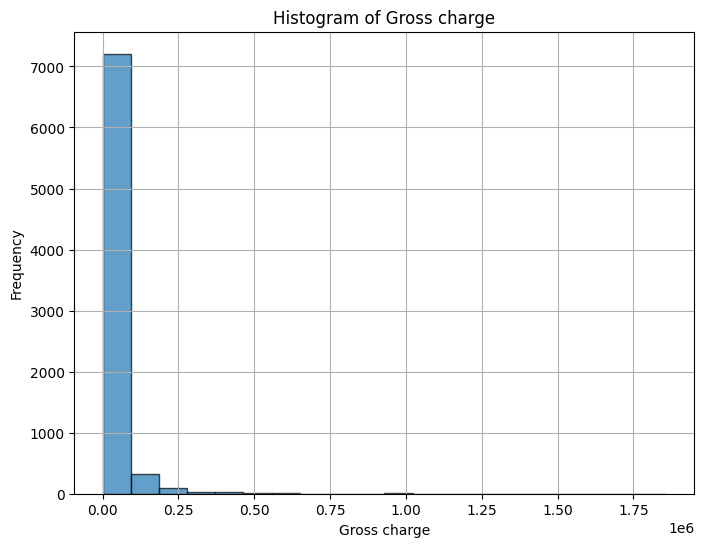

In [148]:
plt.figure(figsize=(8, 6))
plt.hist(SB_df['Gross charge'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Gross charge')
plt.ylabel('Frequency')
plt.title('Histogram of Gross charge')
plt.grid()
plt.show()

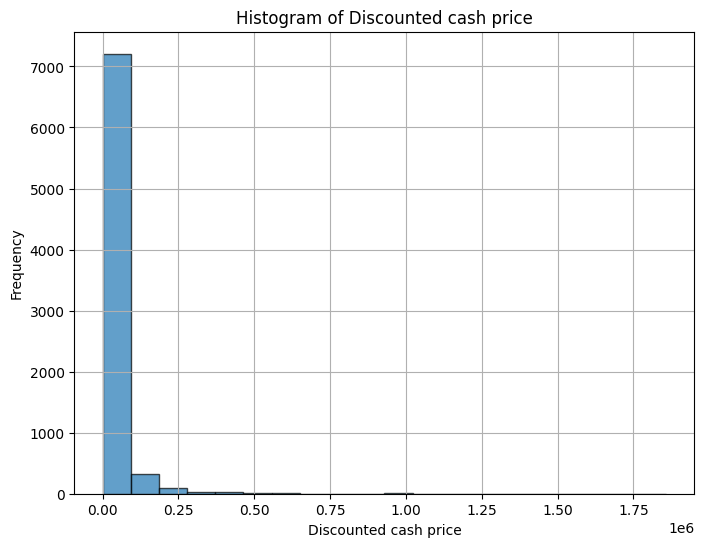

In [149]:
plt.figure(figsize=(8, 6))
plt.hist(SB_df['Discounted cash price'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Discounted cash price')
plt.ylabel('Frequency')
plt.title('Histogram of Discounted cash price')
plt.grid()
plt.show()

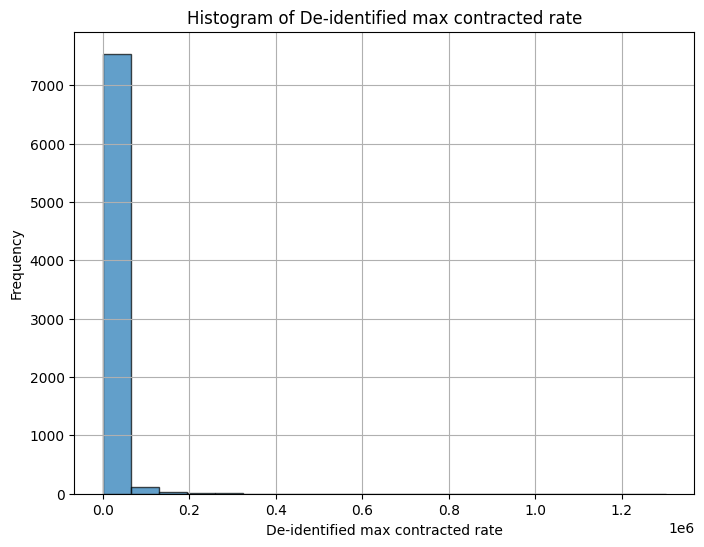

In [150]:
plt.figure(figsize=(8, 6))
plt.hist(SB_df['De-identified max contracted rate'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('De-identified max contracted rate')
plt.ylabel('Frequency')
plt.title('Histogram of De-identified max contracted rate')
plt.grid()
plt.show()

## Calculating the Mean for specific columns

In [151]:
SB_df_description = SB_df.describe()
print(SB_df_description)

       Gross charge  Discounted cash price  De-identified min contracted rate  \
count  7.710000e+03           7.710000e+03                        7710.000000   
mean   2.274832e+04           2.274832e+04                        3318.184112   
std    7.470570e+04           7.470570e+04                        9658.863253   
min    3.000000e-02           3.000000e-02                           0.000000   
25%    1.065895e+03           1.065895e+03                           7.992500   
50%    4.745295e+03           4.745295e+03                         329.195000   
75%    1.103881e+04           1.103881e+04                        3008.800000   
max    1.857952e+06           1.857952e+06                      327869.690000   

       De-identified max contracted rate  Derived contracted rate  \
count                       7.710000e+03              7710.000000   
mean                        8.140578e+03              5122.916424   
std                         2.654620e+04             13381.1405

## Calculating the Mode for specific Columns

In [152]:
mode_value_Gross_charge = SB_df['Gross charge'].mode().iloc[0]
print("Mode Gross charge:", mode_value_Gross_charge)

Mode Gross charge: 8165.0


In [153]:
mode_value_Discounted_cash_price = SB_df['Discounted cash price'].mode().iloc[0]
print("Mode Discounted cash price:", mode_value_Discounted_cash_price)

Mode Discounted cash price: 8165.0


In [154]:
mode_value_De_identified_max_contracted_rate = SB_df['De-identified max contracted rate'].mode().iloc[0]
print("Mode De-identified max contracted rate:", mode_value_De_identified_max_contracted_rate)

Mode De-identified max contracted rate: 0.0


## Calculating the Median for Specific Columns

In [155]:
median_value_Gross_charge = SB_df['Gross charge'].median()
print("Median Gross charge:", median_value_Gross_charge)

Median Gross charge: 4745.295


In [156]:
median_value_Discounted_cash_price = SB_df['Discounted cash price'].median()
print("Median Discounted cash price:", median_value_Discounted_cash_price)

Median Discounted cash price: 4745.295


In [157]:
median_value_De_identified_max_contracted_rate = SB_df['De-identified max contracted rate'].median()
print("Median De-identified max contracted rate:", median_value_De_identified_max_contracted_rate)

Median De-identified max contracted rate: 2352.0


## Calculating the Range for Specific Column

In [158]:
data_range_Gross_charge = SB_df['Gross charge'].max() - SB_df['Gross charge'].min()
print("Data Range (Gross charge):", data_range_Gross_charge)

Data Range (Gross charge): 1857952.41


In [159]:
data_range_Discounted_cash_price = SB_df['Discounted cash price'].max() - SB_df['Discounted cash price'].min()
print("Data Range (Discounted cash price):", data_range_Discounted_cash_price)

Data Range (Discounted cash price): 1857952.41


In [160]:
data_range_De_identified_max_contracted_rate = SB_df['De-identified max contracted rate'].max() - SB_df['De-identified max contracted rate'].min()
print("Data Range (De-identified max contracted rate):", data_range_De_identified_max_contracted_rate)

Data Range (De-identified max contracted rate): 1302635.53


## Calculating the Variance for Specific Coulmns



In [161]:
variance_Gross_charge = np.var(SB_df['Gross charge'])
print("Variance Gross_charge:", variance_Gross_charge)

Variance Gross_charge: 5580218242.883507


In [162]:
variance_Discounted_cash_price = np.var(SB_df['Discounted cash price'])
print("Variance Discounted_cash_price:", variance_Discounted_cash_price)

Variance Discounted_cash_price: 5580218242.883507


In [163]:
variance_De_identified_max_contracted_rate = np.var(SB_df['De-identified max contracted rate'])
print("Variance De_identified_max_contracted_rate:", variance_De_identified_max_contracted_rate)

Variance De_identified_max_contracted_rate: 704609412.1483816


## Calculating the Standard Deviation for Specific Column

In [164]:
std_deviation_Gross_charge = np.std(SB_df['Gross charge'])
print("Standard Deviation Gross charge:", std_deviation_Gross_charge)

Standard Deviation Gross charge: 74700.85838116927


In [165]:
std_deviation_Gross_charge = np.std(SB_df['Discounted cash price'])
print("Standard Deviation Gross charge:", std_deviation_Gross_charge)

Standard Deviation Gross charge: 74700.85838116927


In [166]:
std_deviation_Gross_charge = np.std(SB_df['De-identified max contracted rate'])
print("Standard Deviation Gross charge:", std_deviation_Gross_charge)

Standard Deviation Gross charge: 26544.479880916515


## Frequency counts for categorical variables

In [167]:
SB_df['Type'].value_counts()

Outpatient    6041
Inpatient      886
0              783
Name: Type, dtype: int64

In [168]:
SB_df['Package/Line_Level'].value_counts()

Line       4691
Package    2236
0           783
Name: Package/Line_Level, dtype: int64

## Documenting any captivating insights or observations derived from my analysis.
I observed that all the data is heavily skewed. I also observed that the range of Gross Charge was 1857952.41, which is really high. I also observed that the Mode of the Discounted cash price was the same as the mode of the Gross charge which were both 8165.0. I saw that the Median for Gross charge and the median for the Discounted cash price were both the same, which were 4745.295.

In [169]:
NWMH_df = pd.read_json('Northwestern Memorial Hospital_SC.json', encoding = 'utf-8-sig')
NWMH_df.head(10)

,Billing_Code,Service_Description,Revenue_Code,Gross_Charge,Deidentified_Minimum_Negotiated_Charge,Deidentified_Maximum_Negotiated_Charge,Discounted_Cash_Price,NMH AETNA [3004],NMH AETNA BP [759],NMH AETNA NAP [330],...,NMH BCBS BLUECHOICE PREFERRED [433],NMH BCBS PAR/INDEMNITY ADP [486],NMH BCBS PPO [371],NMH CIGNA ALTERNATIVE [664],NMH CIGNA BROAD [663],NMH CIGNA PLUS NM [680],NMH HEALTH ALLIANCE [399],NMH HUMANA [553],NMH UHC [419],NMH UHC CORE [329]
0,ADA 27204122,HB KNIFE JR ELECTROSURGICAL TISSUE CUT HIGH FR...,272.0,3083.00,554.94,2404.74,2158.10,1035.89,924.9,2404.74,...,755.34,1754.23,1109.88,829.33,2053.28,554.94,1097.55,1214.70,872.49,823.16
1,CPT® 0001A,ADM SARSCOV2 30MCG/0.3ML 1ST,771.0,200.00,36.00,156.00,140.00,42.01,60.0,156.00,...,54.00,113.80,73.00,53.80,133.20,36.00,71.20,78.80,56.60,53.40
2,CPT® 0001U,RED BLOOD CELL TYPING,302.0,954.67,141.12,939.12,668.27,320.77,286.4,744.64,...,257.76,543.21,348.45,256.81,635.81,171.84,339.86,376.14,720.00,720.00
3,CPT® 0002A,ADM SARSCOV2 30MCG/0.3ML 2ND,771.0,200.00,36.00,156.00,140.00,42.01,60.0,156.00,...,54.00,113.80,73.00,53.80,133.20,36.00,71.20,78.80,56.60,53.40
4,CPT® 0003A,ADM SARSCOV2 30MCG/0.3ML 3RD,771.0,200.00,36.00,156.00,140.00,42.01,60.0,156.00,...,54.00,113.80,73.00,53.80,133.20,36.00,71.20,78.80,56.60,53.40
5,CPT® 0003M,"MOLECULAR PATHOLOGY TEST FOR LIVER DISEASE, IN...",300.0,1586.00,55.00,1586.00,1110.20,532.90,475.8,1237.08,...,428.22,902.43,578.89,1543.09,1586.00,285.48,564.62,624.88,59.00,55.00
6,CPT® 0004A,ADM SARSCOV2 30MCG/0.3ML BST,771.0,200.00,36.00,156.00,140.00,42.01,60.0,156.00,...,54.00,113.80,73.00,53.80,133.20,36.00,71.20,78.80,56.60,53.40
7,CPT® 0011A,ADM SARSCOV2 100MCG/0.5ML1ST,771.0,200.00,36.00,156.00,140.00,42.01,60.0,156.00,...,54.00,113.80,73.00,53.80,133.20,36.00,71.20,78.80,56.60,53.40
8,CPT® 0012A,ADM SARSCOV2 100MCG/0.5ML2ND,771.0,200.00,36.00,156.00,140.00,42.01,60.0,156.00,...,54.00,113.80,73.00,53.80,133.20,36.00,71.20,78.80,56.60,53.40
9,CPT® 0013A,ADM SARSCOV2 100MCG/0.5ML3RD,771.0,200.00,36.00,156.00,140.00,42.01,60.0,156.00,...,49.00,113.80,72.00,53.80,133.20,36.00,71.20,78.80,56.60,53.40


## Identifying missing values in the dataset

In [176]:
NWMH_df.isnull().values.sum()

27466

## Replacing all Missing Values With 0

In [177]:
NWMH_df = NWMH_df.fillna(0)

## Confirming there are no missing values

In [178]:
NWMH_df.isnull().values.sum()

0

## Data distribution using histograms for few coumns

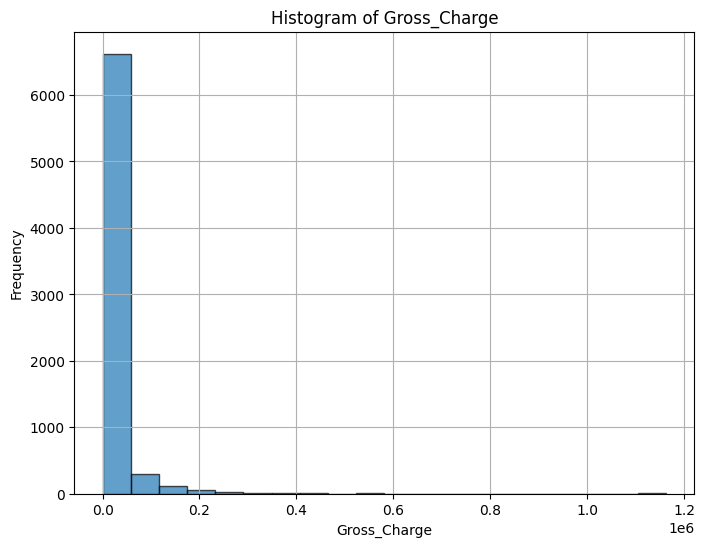

In [183]:
plt.figure(figsize=(8, 6))
plt.hist(NWMH_df['Gross_Charge'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Gross_Charge')
plt.ylabel('Frequency')
plt.title('Histogram of Gross_Charge')
plt.grid()
plt.show()

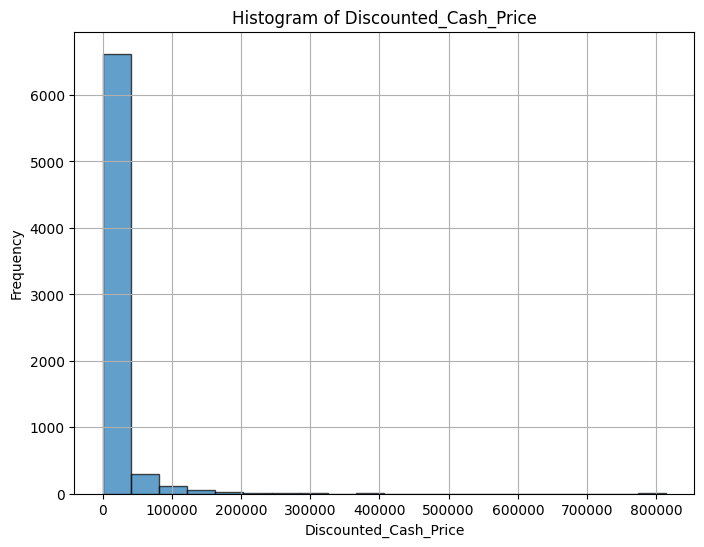

In [184]:
plt.figure(figsize=(8, 6))
plt.hist(NWMH_df['Discounted_Cash_Price'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Discounted_Cash_Price')
plt.ylabel('Frequency')
plt.title('Histogram of Discounted_Cash_Price')
plt.grid()
plt.show()

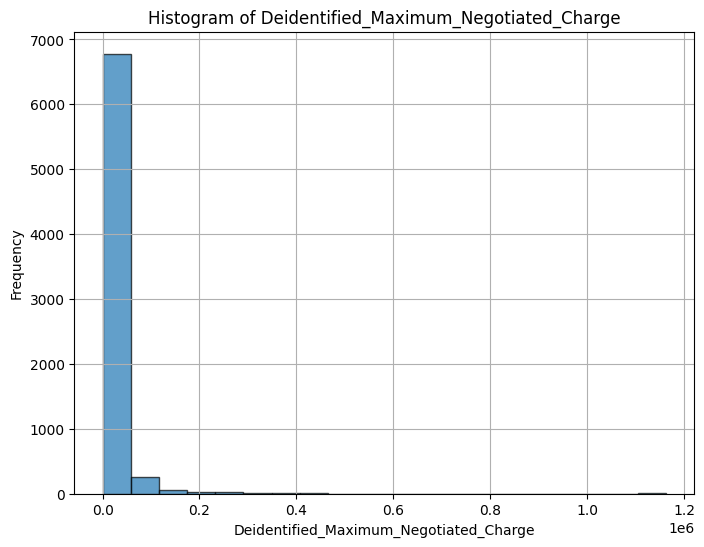

In [185]:
plt.figure(figsize=(8, 6))
plt.hist(NWMH_df['Deidentified_Maximum_Negotiated_Charge'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Deidentified_Maximum_Negotiated_Charge')
plt.ylabel('Frequency')
plt.title('Histogram of Deidentified_Maximum_Negotiated_Charge')
plt.grid()
plt.show()

## Calculating the Mean for specific columns

In [186]:
NWMH_df_description = NWMH_df.describe()
print(NWMH_df_description)

       Revenue_Code  Gross_Charge  Deidentified_Minimum_Negotiated_Charge  \
count   7157.000000  7.157000e+03                            7.157000e+03   
mean     405.938242  1.492502e+04                            4.642318e+03   
std      250.444340  4.898982e+04                            2.870639e+04   
min        0.000000  4.400000e-01                            0.000000e+00   
25%      274.000000  3.080000e+02                            4.509000e+01   
50%      320.000000  1.286000e+03                            2.629800e+02   
75%      481.000000  5.532000e+03                            1.248290e+03   
max     1002.000000  1.163345e+06                            1.163345e+06   

       Deidentified_Maximum_Negotiated_Charge  Discounted_Cash_Price  \
count                            7.157000e+03            7157.000000   
mean                             1.098123e+04           10447.512216   
std                              4.144487e+04           34292.875122   
min               

## Calculating the Mode for specific Columns

In [190]:
mode_value_Gross_charge = NWMH_df['Gross_Charge'].mode().iloc[0]
print("Mode Gross Charge:", mode_value_Gross_charge)

Mode Gross Charge: 200.0


In [191]:
mode_value_Discounted_Cash_Price = NWMH_df['Discounted_Cash_Price'].mode().iloc[0]
print("Mode Discounted_Cash_Price:", mode_value_Discounted_Cash_Price)

Mode Discounted_Cash_Price: 140.0


In [192]:
mode_value_Deidentified_Maximum_Negotiated_Charge = NWMH_df['Deidentified_Maximum_Negotiated_Charge'].mode().iloc[0]
print("Mode Deidentified_Maximum_Negotiated_Charge:", mode_value_Deidentified_Maximum_Negotiated_Charge)

Mode Deidentified_Maximum_Negotiated_Charge: 156.0


## Calculating the Median for Specific Columns

In [193]:
median_value_Gross_Charge = NWMH_df['Gross_Charge'].median()
print("Median Gross_Charge:", median_value_Gross_Charge)

Median Gross_Charge: 1286.0


In [194]:
median_value_Discounted_Cash_Price = NWMH_df['Discounted_Cash_Price'].median()
print("Median Discounted_Cash_Price:", median_value_Discounted_Cash_Price)

Median Discounted_Cash_Price: 900.2


In [195]:
median_value_Deidentified_Maximum_Negotiated_Charge = NWMH_df['Deidentified_Maximum_Negotiated_Charge'].median()
print("Median Deidentified_Maximum_Negotiated_Charge:", median_value_Deidentified_Maximum_Negotiated_Charge)

Median Deidentified_Maximum_Negotiated_Charge: 966.42


## Calculating the Range for Specific Column

In [196]:
data_range_Gross_Charge = NWMH_df['Gross_Charge'].max() - NWMH_df['Gross_Charge'].min()
print("Data Range (Gross_Charge):", data_range_Gross_Charge)

Data Range (Gross_Charge): 1163344.4100000001


In [197]:
data_range_Discounted_Cash_Price = NWMH_df['Discounted_Cash_Price'].max() - NWMH_df['Discounted_Cash_Price'].min()
print("Data Range (Discounted_Cash_Price):", data_range_Discounted_Cash_Price)

Data Range (Discounted_Cash_Price): 814341.09


In [198]:
data_range_Deidentified_Maximum_Negotiated_Charge = NWMH_df['Deidentified_Maximum_Negotiated_Charge'].max() - NWMH_df['Deidentified_Maximum_Negotiated_Charge'].min()
print("Data Range (Deidentified_Maximum_Negotiated_Charge):", data_range_Deidentified_Maximum_Negotiated_Charge)

Data Range (Deidentified_Maximum_Negotiated_Charge): 1163344.4100000001


## Calculating the Variance for Specific Coulmns

In [200]:
variance_Gross_Charge = np.var(NWMH_df['Gross_Charge'])
print("Variance Gross_Charge:", variance_Gross_Charge)

Variance Gross_Charge: 2399667266.417875


In [202]:
variance_Discounted_Cash_Price  = np.var(NWMH_df['Discounted_Cash_Price'])
print("Variance Discounted_Cash_Price :", variance_Discounted_Cash_Price)

Variance Discounted_Cash_Price : 1175836969.2737792


In [203]:
variance_Deidentified_Maximum_Negotiated_Charge = np.var(NWMH_df['Deidentified_Maximum_Negotiated_Charge'])
print("Deidentified_Maximum_Negotiated_Charge:", variance_Deidentified_Maximum_Negotiated_Charge)

Deidentified_Maximum_Negotiated_Charge: 1717437155.5904357


## Calculating the Standard Deviation for Specific Column

In [205]:
std_deviation_Gross_Charge = np.std(NWMH_df['Gross_Charge'])
print("Standard Deviation Gross charge:", std_deviation_Gross_Charge)

Standard Deviation Gross charge: 48986.39879005064


In [206]:
std_deviation_Discounted_Cash_Price = np.std(NWMH_df['Discounted_Cash_Price'])
print("Standard Deviation Discounted_Cash_Price:", std_deviation_Discounted_Cash_Price)

Standard Deviation Discounted_Cash_Price: 34290.47928031597


In [207]:
std_deviation_Deidentified_Maximum_Negotiated_Charge = np.std(NWMH_df['Deidentified_Maximum_Negotiated_Charge'])
print("Standard Deviation Deidentified_Maximum_Negotiated_Charge:", std_deviation_Deidentified_Maximum_Negotiated_Charge)

Standard Deviation Deidentified_Maximum_Negotiated_Charge: 41441.97335540908


## Frequency counts for categorical variables

In [208]:
NWMH_df['Billing_Code'].value_counts()

CPT® 86341                  7
CPT® 90853                  5
HCPCS A4648                 5
Custom 36100775             4
CPT® 49999                  4
                           ..
CPT® 85396                  1
CPT® 85397                  1
CPT® 85410                  1
CPT® 85415                  1
MS-DRG V40 (FY 2023) 999    1
Name: Billing_Code, Length: 5508, dtype: int64

In [210]:
NWMH_df['Service_Description'].value_counts()

PLACE CATHETER IN ARTERY                                                      13
TREAT FINGER FRACTURE EACH                                                    12
SMALL BOWEL ENDOSCOPY                                                         12
INJECTION TREATMENT OF NERVE                                                   9
TREATMENT OF ANKLE FRACTURE                                                    9
                                                                              ..
DETECTION OF ENDOMYSIAL ANTIBODY (EMA)                                         1
SCREENING TEST FOR ANTIBODY TO NONINFECTIOUS AGENT                             1
HB REF MYASTHENIA GRAVIS PANEL, REFLEX STRIATED MUSCLE AB TITER (Q)            1
IMMUNOLOGIC ANALYSIS FOR DETECTION OF TUMOR ANTIGEN, QUANTITATIVE; CA 15-3     1
UNGROUPABLE                                                                    1
Name: Service_Description, Length: 5258, dtype: int64

# sqlite3

## Creating a sqlite3 Connection

In [170]:
connection = sqlite3.connect('health.db')
cursor = connection.cursor()

## Creating a Table for Patient Information

In [171]:
cursor.execute('''CREATE TABLE PatientInformation (id INT, DOB TEXT, age INT, gender TEXT, zipcode TEXT)''')

## Inserting 2 rows of fake data

In [172]:
cursor.execute('INSERT INTO PatientInformation (id, DOB, age, gender, zipcode) VALUES (1, "01-01-1998", 25, "Male", "87048")')

In [173]:
cursor.execute('INSERT INTO PatientInformation (id, DOB, age, gender, zipcode) VALUES (2, "03-08-1994", 29, "Female", "	78634")')

## Inserting data frame data into sql

In [174]:
SB_df.to_sql('Stony_Brook_Standard_Charges',
               con = connection)

7710

## Inserting data frame data into sql

In [175]:
NWMH_df.to_sql('Northwestern_Memorial_Hospital_Standard_Charges',
               con = connection)

7157